In [1]:
import nltk
import os
import string
from HMM import supervised_HMM, unsupervised_HMM, HiddenMarkovModel
import re
import numpy as np
from HMM_helper import (
    text_to_wordcloud,
    states_to_wordclouds,
    visualize_sparsities,
    animate_emission
)

In [2]:
def load_poems(filename):
    
    lines = [] # 2d dictionary, each array is a split + cleaned line
    words = {} # dictionary of a word, and its frequency
    
    file = open(filename, 'r')
    
    for line in file:
        line = line.strip()
        if  len(line) < 10:
            # Too short to be a valid line
            continue
        line = "".join(l for l in line if l not in string.punctuation)
        line = line.lower()
        line = line.split()
        
        lines.append(line)

        for word in line:
            try:
                # add to frequency if the word is already in the dic
                words[word] += 1
            except KeyError:
                # if not, add the word to the dic
                words[word] = 1
    return lines, words

In [3]:
file = "data/shakespeare.txt"
lines, words = load_poems(file)

In [4]:
lines[0]

['from', 'fairest', 'creatures', 'we', 'desire', 'increase']

In [5]:
def unsupervised_learning(lines, n_states, n_iters):
    '''
    n_iters: Number of iterations we should go through.
    n_states: Number of hidden states our HMM should have.
    '''
    # Train the HMM.
    obs, obs_map =  parse_observations(lines)
    flat_lines = [[item] for sublist in lines for item in sublist]
    leHMM = unsupervised_HMM(obs, n_states, n_iters)
    return leHMM, obs,obs_map 
    

In [6]:
def obs_map_reverser(obs_map):
    obs_map_r = {}

    for key in obs_map:
        obs_map_r[obs_map[key]] = key

    return obs_map_r

In [7]:
def parse_observations(lines):

    obs_counter = 0
    obs = []
    obs_map = {}

    for line in lines:
        obs_elem = []

        for word in line:
            word = re.sub(r'[^\w]', '', word).lower()
            if word not in obs_map:
                # Add unique words to the observations map.
                obs_map[word] = obs_counter
                obs_counter += 1

            # Add the encoded word.
            obs_elem.append(obs_map[word])

        # Add the encoded sequence.
        obs.append(obs_elem)

    return obs, obs_map

In [8]:
obs, obs_map = parse_observations(lines)

In [9]:
# get syllable info from syllable_dictionary.txt
def load_syllables(filename):
    file = open(filename, 'r')
    syllable = {}
    for line in file:
        line = line.split()
        #print(line)
        word = line[0]
        rest = line[1: len(line)]

        syllable[word] = rest
    return syllable

In [10]:
filename = "data/Syllable_dictionary.txt"
syllable = load_syllables(filename)

In [11]:
def save_HMM(hmmmmmm, filename):
    
    with open(filename+".txt", "w+") as filept:
        filept.write(str(hmmmmmm.L)+"\n")
        filept.write(str(hmmmmmm.D)+"\n")
        for i in hmmmmmm.A:
            line = ""
            for j in i:
                line += str(j) + ","
            filept.write(line[:len(line)-1]+"\n")
        for i in hmmmmmm.O:
            line = ""
            for j in i:
                line += str(j) + ","
            filept.write(line[:len(line)-1]+"\n")
        

def read_HMM(filename):
    with open(filename+".txt", "r") as filept:
        L = int(filept.readline())
        D = int(filept.readline())
        O = []
        A = []
        for i in range(L):
            line = [float(x) for x in filept.readline().split(",")]
            A.append(line)
        for j in range(L):
            line = [float(x) for x in filept.readline().split(",")]
            O.append(line)
    return HiddenMarkovModel(A, O)

In [12]:
testHMM40 = read_HMM("40-iter-8-hidden-hmm")

In [13]:
obs_map_r = obs_map_reverser(obs_map)

In [14]:
for i in range(14): # each poem is 14 lines long
    emission = testHMM40.generate_emission(10) # each line is 10 words long
    sentence = [obs_map_r[i] for i in emission[0]]

    print(' '.join(sentence).capitalize())

Doth for ruth nerves even tongue being the thousand thine
If of his outward that thou nor banks be blindness
Too verse of my celestial times might defects should more
More thee you thee i riper their score no belied
Then be death the so by wrought possession hand write
Well thou then vassalage glory whether and have that seen
Limbs lives with my each hast thou my it learned
To lovesuit wound breath dear change for fault me i
The accidents that him that days and from rehearse eye
All make impregnable labouring be the cover for more eyes
I rude it face the than not the heaven of
Remembrance gaze child rank hied which a woman perfectst of
Hath what it as follow bloody that then what thou
And and beloved lie many or daily thee me be


In [15]:
for i in range(14): # each poem is 14 lines long
    emission = testHMM40.generate_emission_syllables(10, obs_map_r, syllable) # each line is 10 words long
    sentence = [obs_map_r[i] for i in emission[0]]

    print(' '.join(sentence).capitalize())

Finds which and do bars the thy thievish love
My that eye is receiving thy love see
When what call every changing the for such
Find pass shadows afloat but self saying
So and living how palate sail which wilt
Is and to this be meet till a woe streams
Well that mine vermilion best seemly two
Mute offenders freedom art now rider
Sadly shadows or live tend small of in
Theirs your suspect injuries false so is
This of but weeds face that be others fair
I the her very beyond me read life
Clock cup beauties i to by thy year love
Lameness thou be o which not it the your


In [16]:
for i in range(14): # each poem is 14 lines long
    emission = testHMM40.generate_emission_syllables_other(10, obs_map_r, syllable) # each line is 10 words long
    sentence = [obs_map_r[i] for i in emission[0]]

    print(' '.join(sentence).capitalize())

See how in love when loves call soul my hope
You cure a more me thy upon crying
That evil chief art tend antique and peace
Ordering stars the accident hath time
Looks his breed thy i that lie mind love which
Is mayst forth trifles love but best their name
Days flattery in his self despised he
Tend unlooked of thy winged and a cure
Beds music alone dies with air foolish
And varying truth steal do my converted
Ill a being they expressed those eat than leap
All this in the outstripped monuments have
Seest if thou i doth will call tears thence thy
A thine my shadow it be blood over


In [17]:
for i in range(14): # each poem is 14 lines long
    emission = testHMM40.generate_emission_syllables_correct(10, obs_map_r, syllable) # each line is 10 words long
    sentence = [obs_map_r[i] for i in emission[0]]

    print(' '.join(sentence).capitalize())

When up better mine and find thine how kill
I being beauty is all autumn by i
Stage a likeness his lively now love through
Twilight too his thy she is freedom of
Bide in blest will no true sail true deserts
With shore languished be of is thy world like
More others stage this the by the red be
On which will possession woo truths patience
Some do can love will outward me love or
Be days hold doth breathes signs to with the tell
Skill of with dead than it appetite the
I found those by left confessed more strange off
Of hearts ere conspire is golden and holds
Record and love in your truth such that true


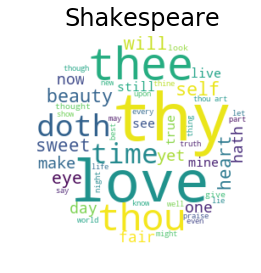

In [18]:
text = open(os.path.join(os.getcwd(), 'data/shakespeare.txt')).read()
wordcloud = text_to_wordcloud(text, title='Shakespeare')

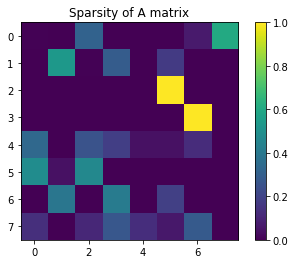

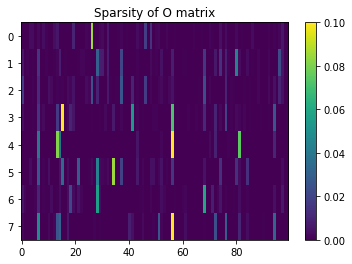

In [19]:
visualize_sparsities(testHMM40, O_max_cols=100)

In [20]:
len(testHMM40.O[0])

3175

In [21]:
emission

([1663, 56, 457, 68, 576, 636, 463, 6, 395], [0, 7, 0, 2, 5, 1, 1, 5, 0])

In [22]:
ind = np.where(np.array(emission[1]) == 5)[0]
ind

array([4, 7], dtype=int64)

In [23]:
np.array(emission[0])[ind]

array([576,   6])

In [24]:
obs_map_r[247]

'work'

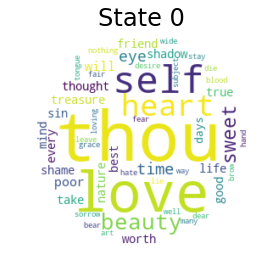

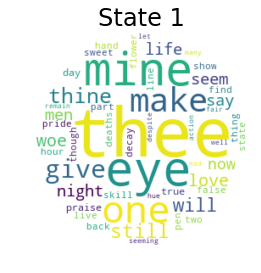

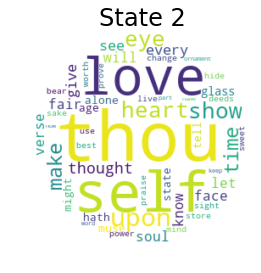

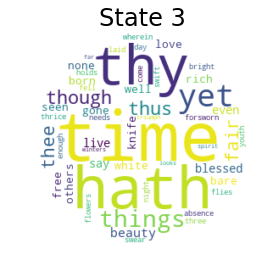

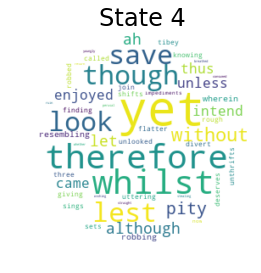

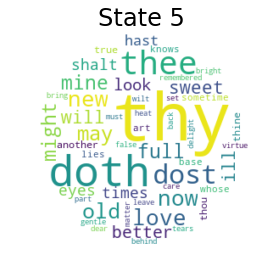

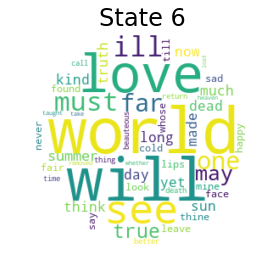

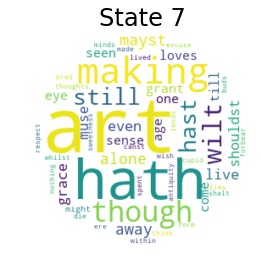

In [25]:
wordclouds = states_to_wordclouds(testHMM40, obs_map, syllable)

In [18]:
def script():
    file = open("data/shakespeare.txt", 'r')
    throwaway = [98, 125, 144]
    sonnet_counter = 0
    i = 0
    all_pairs = []
    temp = [[] for _ in range(7)]
    for line in file:
        line = line.strip()
        if len(line) < 10:
            # Too short to be a valid line
            if i != 0:
                if sonnet_counter not in throwaway:
                    all_pairs.extend(temp)
                sonnet_counter += 1
                i = 0
                temp = [[] for _ in range(7)]
            continue
        line = "".join(l for l in line if l not in string.punctuation)
        line = line.lower()
        line = line.split()
        
        last = line[-1]
        
        if i == 0 or i == 2:
            # a
            temp[0].append(last)
        elif i == 1 or i == 3:
            #b
            temp[1].append(last)
        elif i==4 or i==6:
            #c
            temp[2].append(last)
        elif i==5 or i==7:
            #d
            temp[3].append(last)
            
        elif i==8 or i==10:
            #e
            temp[4].append(last)
            
        elif i==9 or i==11:
            #f
            temp[5].append(last)
            
        elif i==12 or i==13:
            #g
            temp[6].append(last)
            
        i += 1
        lines.append(line)

                
    all_pairs_dict = {}
    for i, j in all_pairs:
        if i not in all_pairs_dict:
                    all_pairs_dict[i] = [j]
                
        if j not in all_pairs_dict:
                    all_pairs_dict[j] = [i]
                
        # checking all against all other pairs
        for k in all_pairs:
            # If i or j is in k, this means we need to add things
            if i in k or j in k:
                for a in k:
                    if a not in all_pairs_dict[i] and a != i:
                        all_pairs_dict[i].append(a)
                    if a not in all_pairs_dict[j] and a != j:
                        all_pairs_dict[j].append(a)
           
    # Completing the graph. 
    for key, val in all_pairs_dict.items():
        for i in val:
            if key not in all_pairs_dict[i]:
                all_pairs_dict[i].append(key)
            for j in val:
                if j != i and j not in all_pairs_dict[i]:
                    all_pairs_dict[i].append(j)
                    
    return all_pairs, all_pairs_dict

In [19]:
all_pairs, all_pairs_dict  = script()

In [20]:
for i in range(7): # each poem is 14 lines long, with 7 rhymes
    word = np.random.choice(list(all_pairs_dict.keys()))
    words = all_pairs_dict[word]
    word2 = np.random.choice(words)
    emission1 = testHMM40.generate_emission_rhyme(10, obs_map_r, obs_map[word]) # each line is 10 words long
    emission2 = testHMM40.generate_emission_rhyme(10, obs_map_r, obs_map[word2])
    sentence1 = [obs_map_r[i] for i in emission1[0]]
    sentence2 = [obs_map_r[i] for i in emission2[0]]

    print(' '.join(sentence1).capitalize())
    print(' '.join(sentence2).capitalize())

8 3175 8 8
208


IndexError: list index out of range

In [ ]:
word = np.random.choice(list(all_pairs_dict.keys()))

In [ ]:
obs_map[word]